# Regression using climate model data and the NearestPoint regression model


For each sea level datapoint, a wind data point located nearest to the sea level data location is obtained to perform the regression analysis.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Documents/Wind effect/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical' # For data_type choose ['historical', 'piControl', 'ssp119', 'ssp126', 'ssp245' 'ssp370', 'ssp585']
model = 'NearestPoint'

#### Import and plot cmip6 sea level data (zos) and wind data historical

In [5]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [6]:
zos.model

<xarray.DataArray 'model' (model: 51)>
array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0',
       'CAS-ESM2-0', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2',
       'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
       'CanESM5', 'CanESM5-CanOE', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0',
       'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H',
       'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'INM-CM4-8', 'INM-CM5-0',
       'IPSL-CM6A-LR', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1',
       'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL'],
      dtype=object)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'

In [7]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [8]:
wind_data.model

<xarray.DataArray 'model' (model: 43)>
array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-ESM-1-1-LR', 'BCC-CSM2-MR',
       'BCC-ESM1', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CMCC-CM2-SR5', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'CanESM5-CanOE', 'EC-Earth3',
       'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'GFDL-CM4', 'GFDL-ESM4',
       'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'HadGEM3-GC31-LL',
       'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0',
       'IPSL-CM5A2-INCA', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'KIOST-ESM',
       'MCM-UA-1-0', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1',
       'UKESM1-0-LL'], dtype=object)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'

### Plot data

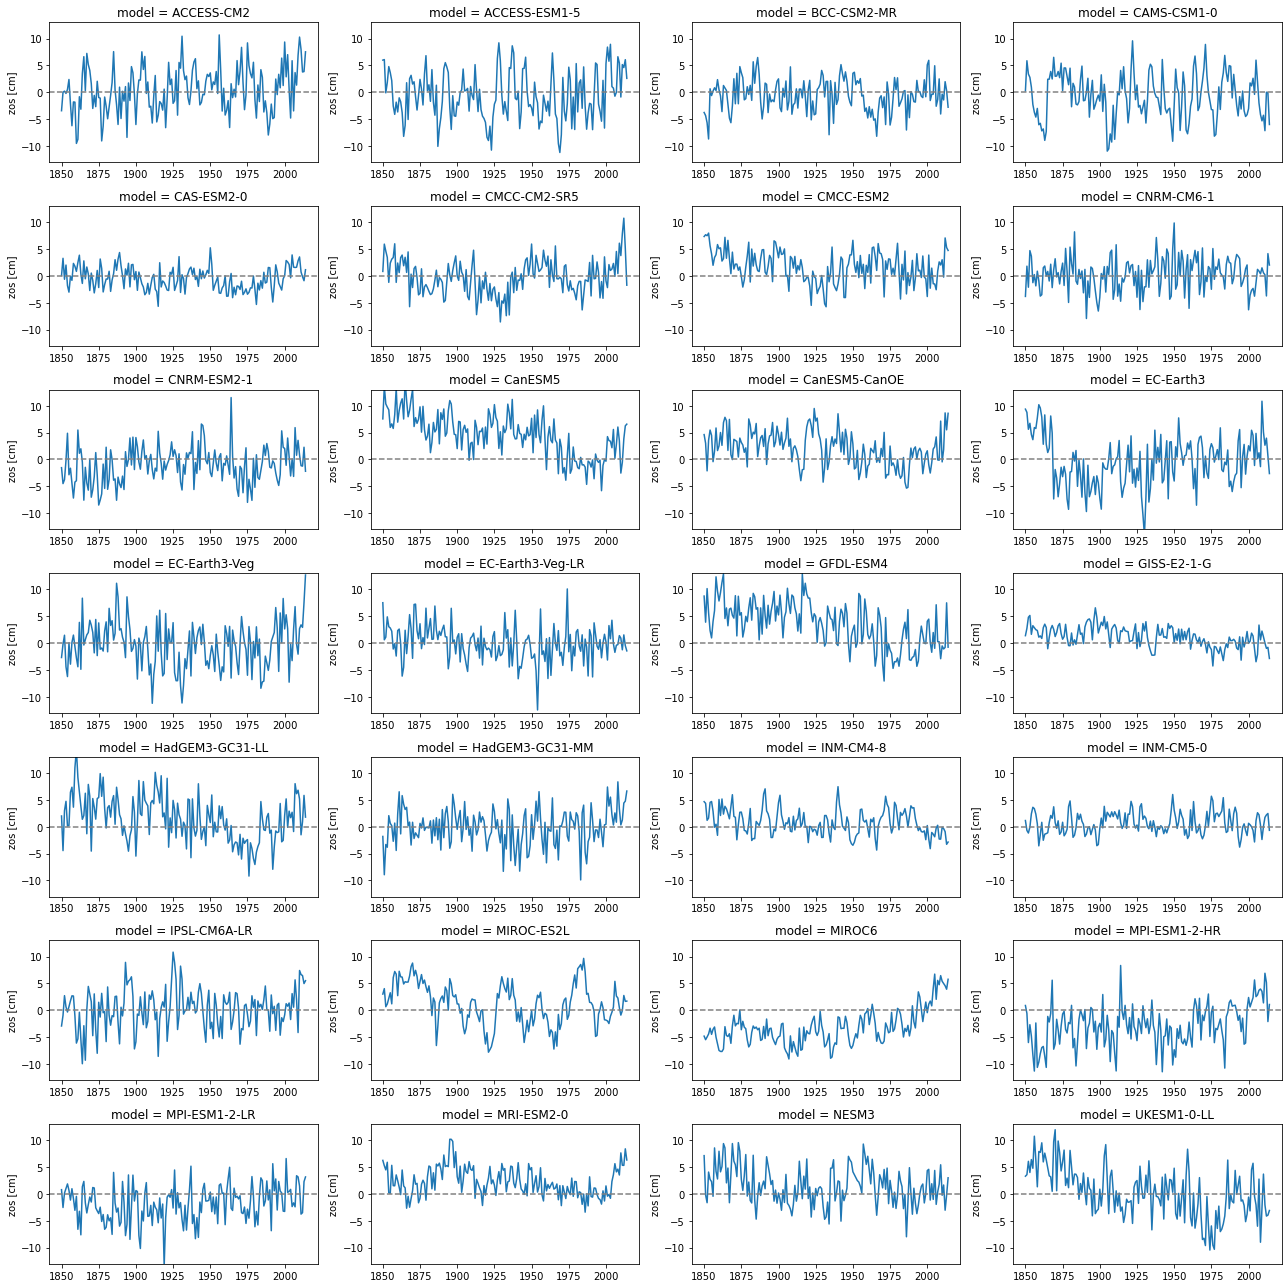

In [145]:
figs.plot_zos_data_per_model(zos, data_type)

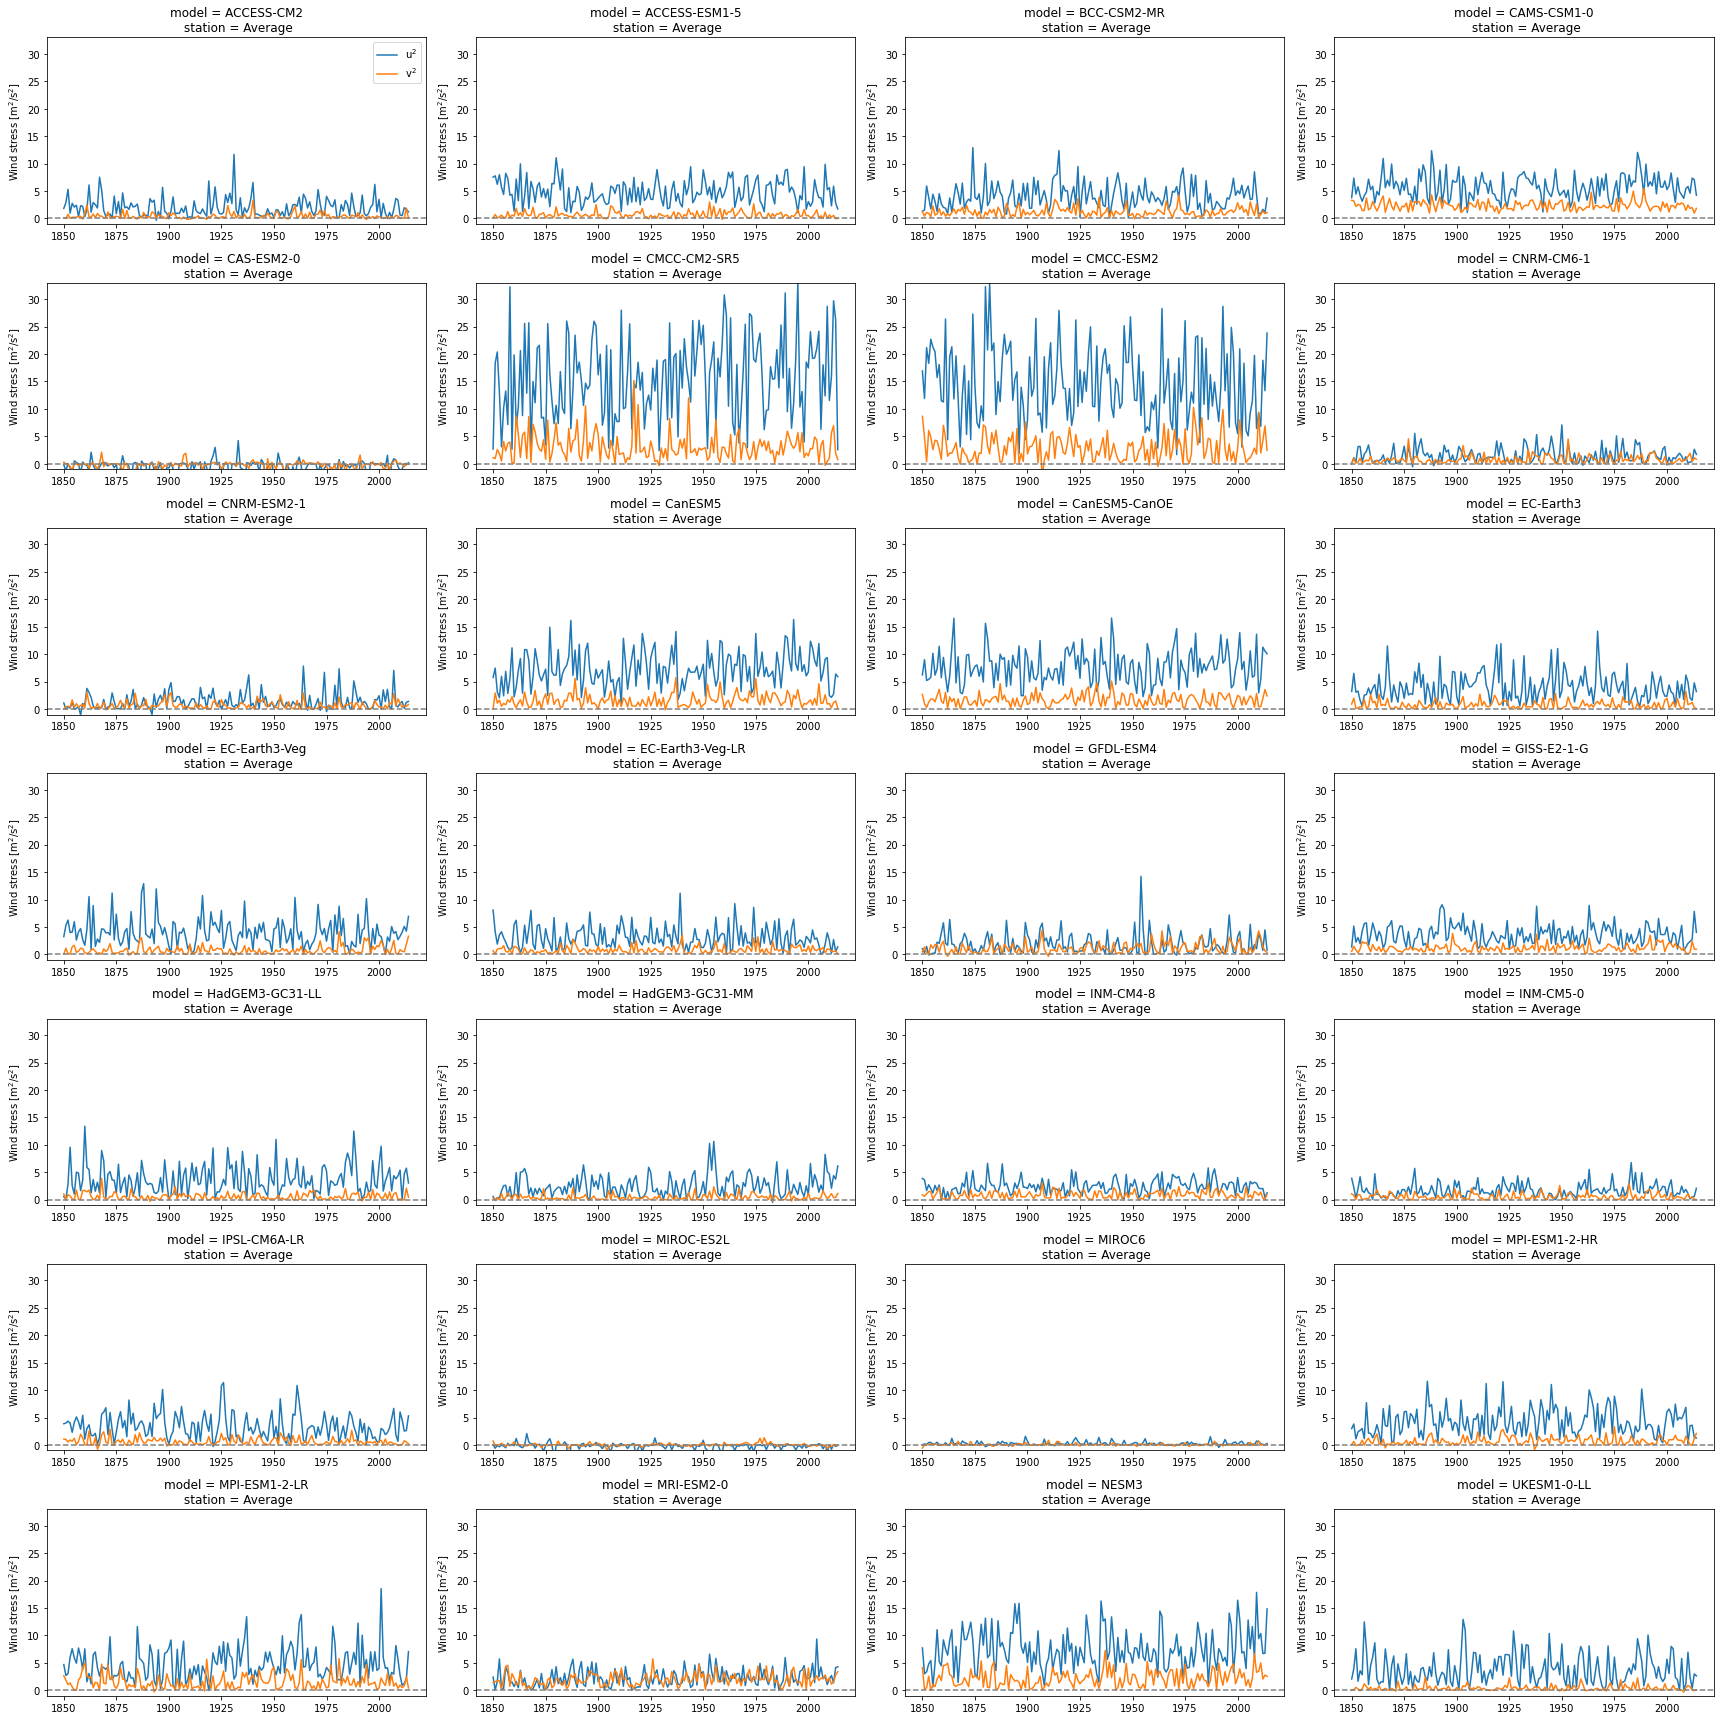

In [146]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type)

#### Plot data locations

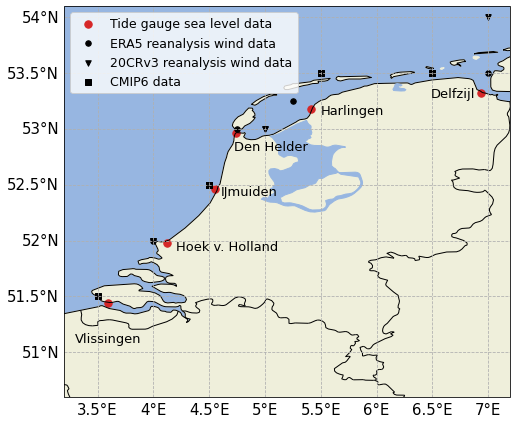

In [147]:
figs.plot_np_locations(title = False)

### Perform regression

In [148]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [149]:
results.sel(station='Average', drop=True).to_pandas().T

model     ACCESS-CM2  ACCESS-ESM1-5  BCC-CSM2-MR  CAMS-CSM1-0  CAS-ESM2-0  \
r2          0.392258       0.200593     0.248008     0.142345    0.321909   
r2_wind     0.293669       0.191183     0.238303     0.138529    0.177809   
r2_u2       0.215973       0.120731     0.084723     0.133412    0.173810   
r2_v2       0.014834       0.023847     0.095614     0.007806    0.001913   
rmse        3.123602       3.903788     2.687966     3.940232    1.705661   
constant    0.931595      -1.103339    -0.798052    -0.748820   -0.984511   
u2          2.217378       1.860793     1.215754     1.670584   -0.918935   
v2         -1.245161      -1.102817    -1.213838    -0.366240    0.117686   
trend       1.589211      -0.536992    -0.385422    -0.331424   -0.993544   

model     CMCC-CM2-SR5  CMCC-ESM2  CNRM-CM6-1  CNRM-ESM2-1   CanESM5  ...  \
r2            0.295193   0.275817    0.547119     0.606347  0.605239  ...   
r2_wind       0.261280   0.218049    0.544110     0.601117  0.186909  ...   
r2_u2         0.229229   0.149202    0.415269     0.527560  0.190673  ...   
r2_v2         0.061760   0.134067    0.258232     0.293163  0.060439  ...   
rmse          2.555383   2.520584    2.170244     2.184865  2.243567  ...   
constant     -0.658713   1.628287    0.360872    -1.079985  4.670960  ...   
u2            1.496767   0.817134    1.703923     2.190258  1.610340  ...   
v2            0.466434   0.852684    1.131348     1.049361  0.423838  ...   
trend        -0.711517  -0.901788    0.224109     0.317923 -2.937156  ...   

model     INM-CM4-8  INM-CM5-0  IPSL-CM6A-LR  MIROC-ES2L    MIROC6  \
r2         0.105410   0.099948      0.583454    0.386795  0.174519   
r2_wind    0.056491   0.081953      0.570077    0.126792  0.130208   
r2_u2      0.040719   0.078057      0.494859    0.105098  0.126700   
r2_v2      0.001707   0.000251      0.266058    0.070070  0.001968   
rmse       2.251271   1.869527      2.450155    3.031676  1.999524   
constant   0.834800   0.909353      0.014388    0.174453 -4.038602   
u2         0.661063   0.604320      2.179706    0.676332  0.820067   
v2        -0.304897  -0.116392      1.098089    1.206204 -0.121859   
trend     -0.666903   0.333042      0.553768   -2.502999  0.583517   

model     MPI-ESM1-2-HR  MPI-ESM1-2-LR  MRI-ESM2-0     NESM3  UKESM1-0-LL  
r2             0.493667       0.672336    0.424209  0.479294     0.718855  
r2_wind        0.492758       0.665039    0.314733  0.448562     0.321769  
r2_u2          0.457630       0.658200    0.297583  0.327884     0.300217  
r2_v2          0.006573       0.096242    0.102165  0.253757     0.095066  
rmse           2.499018       1.856670    1.912912  2.540924     2.490309  
constant      -3.606623      -2.293255    2.210215  1.818710    -0.521701  
u2             2.574871       2.736988    1.411563  1.660374     2.050233  
v2            -0.701877       0.253176    0.520079  1.344630     1.085319  
trend          0.134944      -0.353290   -1.078618 -0.777515    -3.728669  

[9 rows x 28 columns]

In [150]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

u$^2$  v$^2$  trend  total  wind total
model                                                   
ACCESS-CM2         True  False   True   True        True
ACCESS-ESM1-5      True  False  False   True        True
BCC-CSM2-MR        True   True  False   True        True
CAMS-CSM1-0        True  False  False   True        True
CAS-ESM2-0         True  False   True   True        True
CMCC-CM2-SR5       True   True  False   True        True
CMCC-ESM2          True   True   True   True        True
CNRM-CM6-1         True   True  False   True        True
CNRM-ESM2-1        True   True  False   True        True
CanESM5            True   True   True   True        True
CanESM5-CanOE      True   True   True   True        True
EC-Earth3          True   True  False   True        True
EC-Earth3-Veg      True   True   True   True        True
EC-Earth3-Veg-LR   True   True   True   True        True
GFDL-ESM4          True  False   True   True        True
GISS-E2-1-G        True  False   True   True        True
HadGEM3-GC31-LL    True   True   True   True        True
HadGEM3-GC31-MM    True   True  False   True        True
INM-CM4-8          True  False   True   True        True
INM-CM5-0          True  False  False   True        True
IPSL-CM6A-LR       True   True  False   True        True
MIROC-ES2L         True   True   True   True        True
MIROC6             True  False   True   True        True
MPI-ESM1-2-HR      True  False  False   True        True
MPI-ESM1-2-LR      True   True  False   True        True
MRI-ESM2-0         True   True   True   True        True
NESM3              True   True   True   True        True
UKESM1-0-LL        True   True   True   True        True

#### Plot regression results

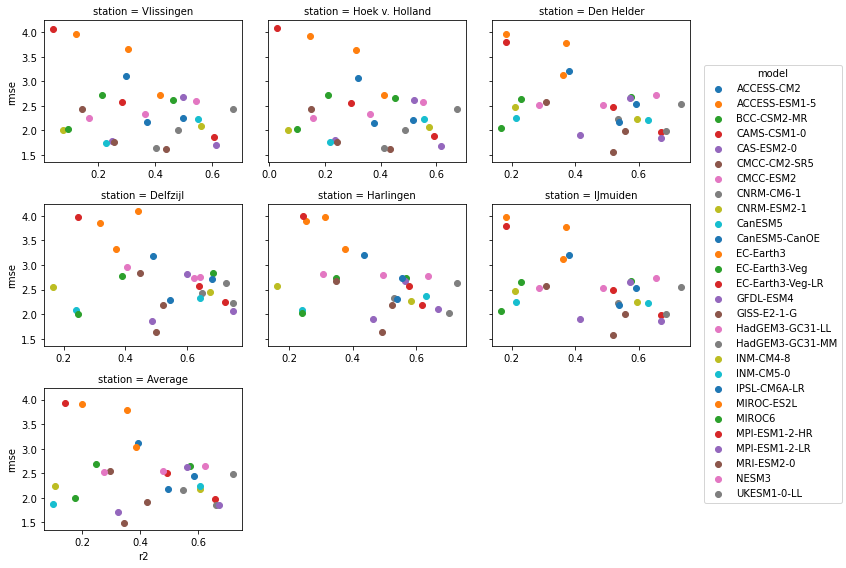

In [151]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

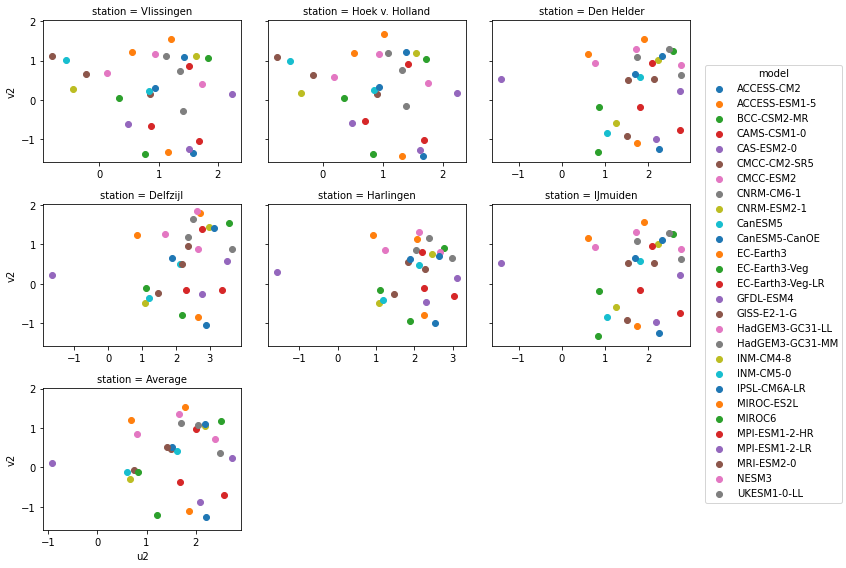

In [152]:
figs.plot_cmip6_two_variables(results, 'u2', 'v2', data_type)

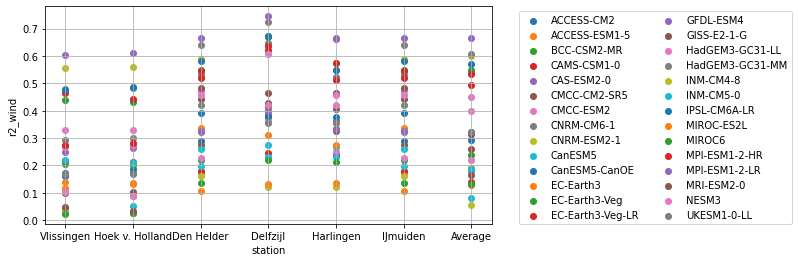

In [153]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type)

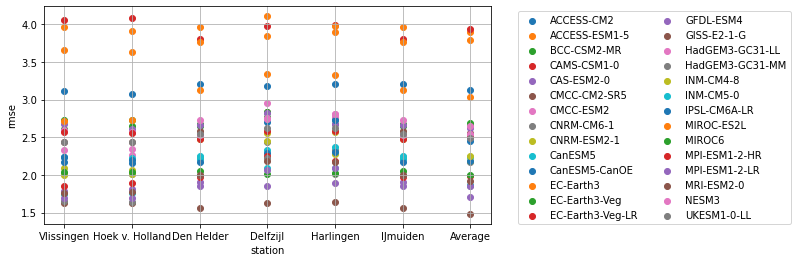

In [154]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

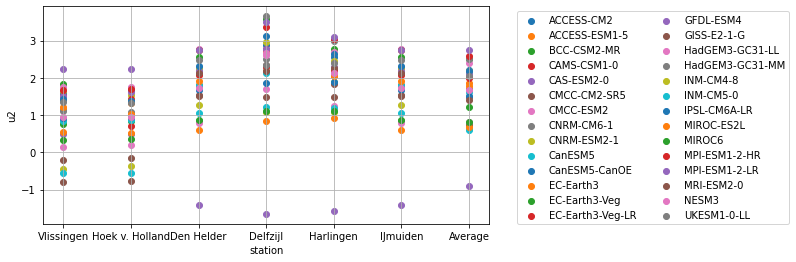

In [155]:
figs.plot_cmip6_result_per_station(results, 'u2', data_type)

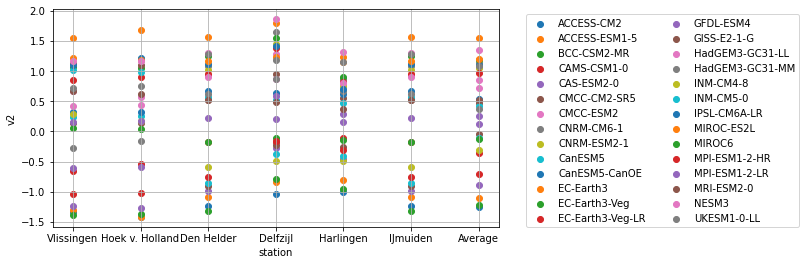

In [156]:
figs.plot_cmip6_result_per_station(results, 'v2', data_type)

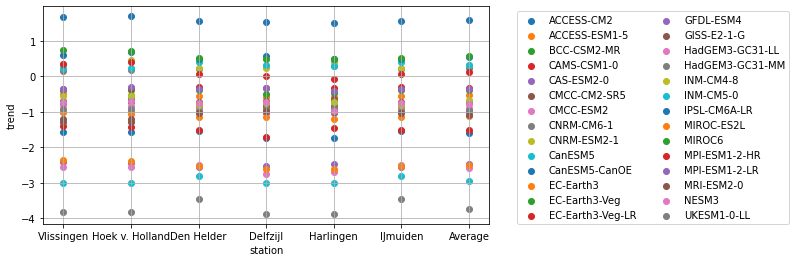

In [157]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

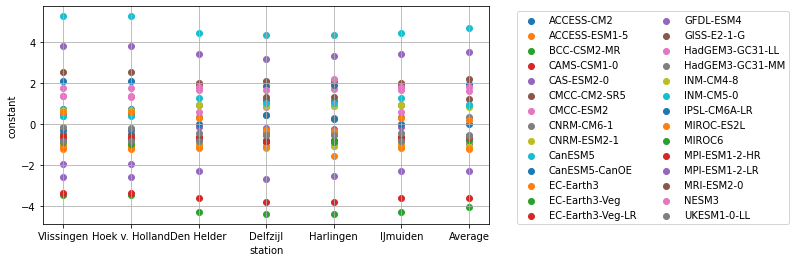

In [158]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

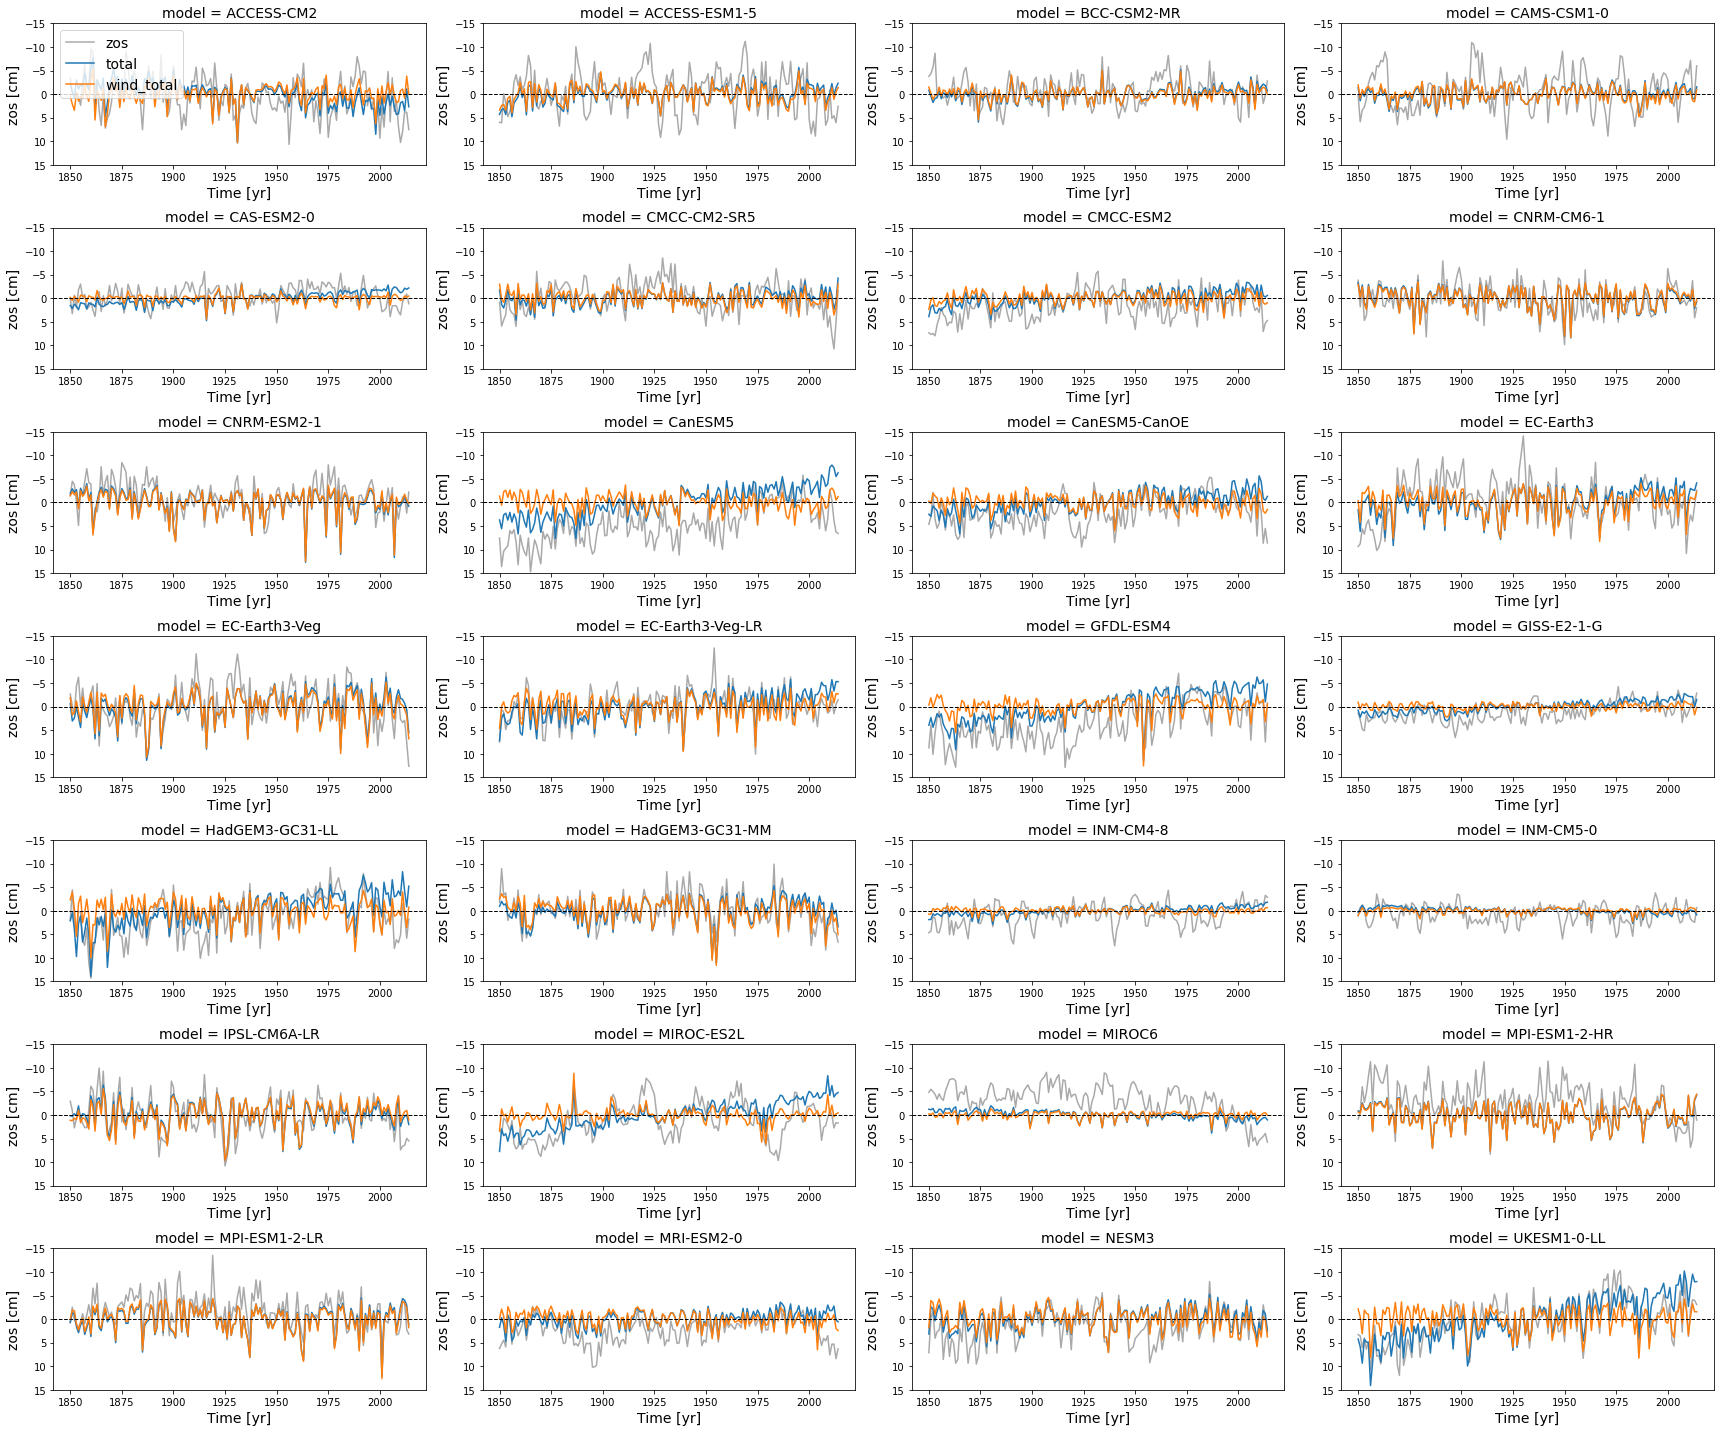

In [159]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

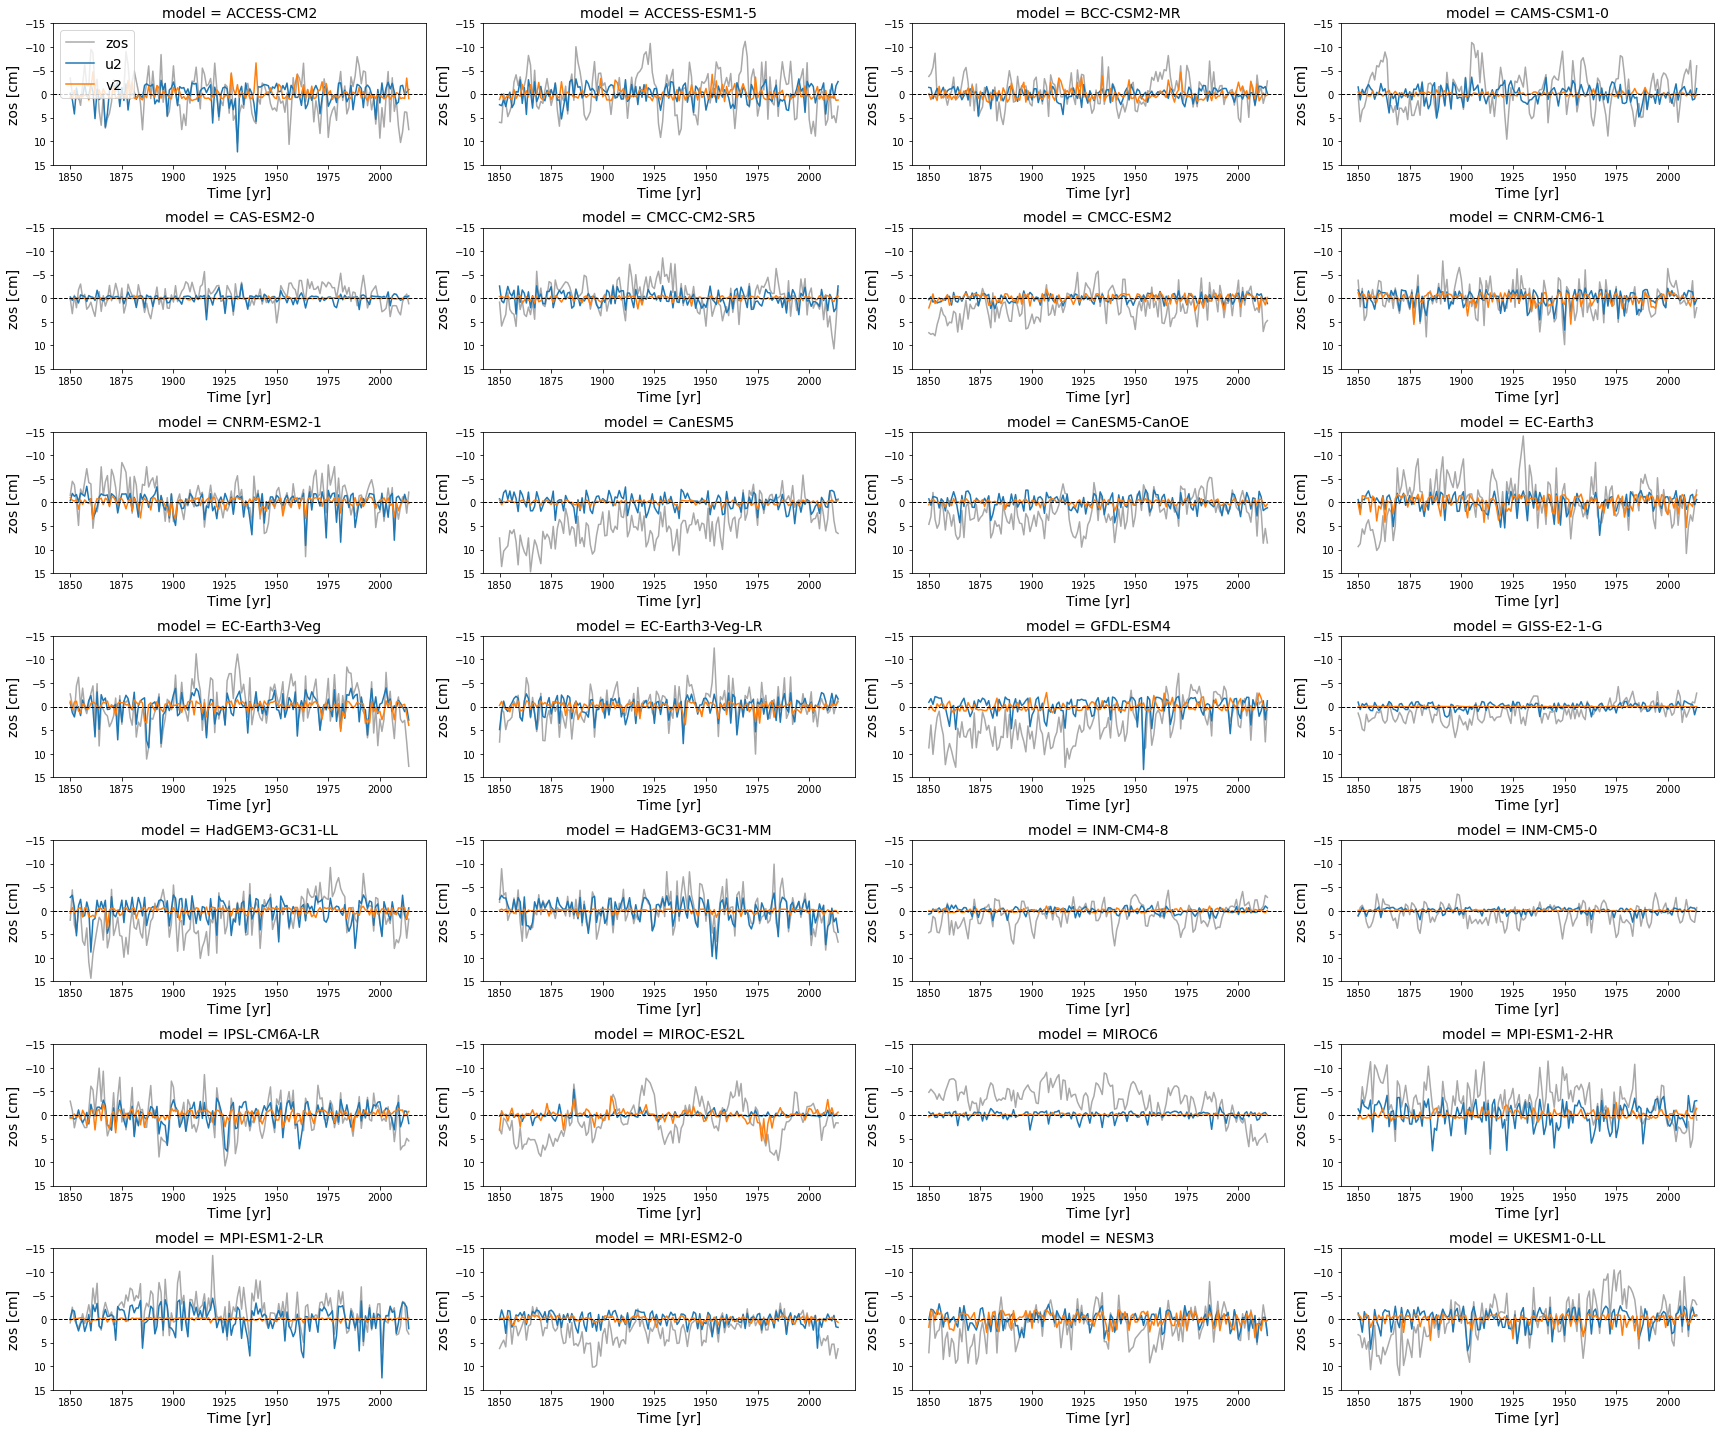

In [160]:
labels = ['u2', 'v2']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model)

#### Plot trends

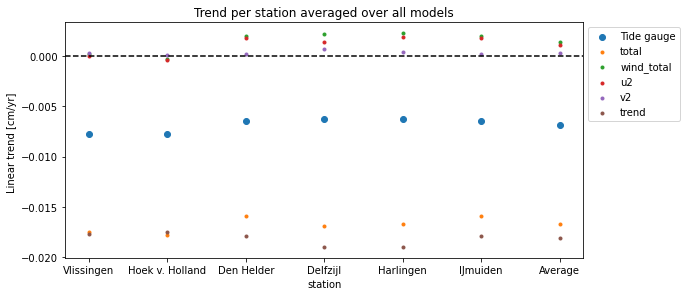

In [161]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2', 'v2', 'trend'], model, data_type, errorbar = False)

In [162]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': timeseries.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in timeseries.model.values:
    df_trends['trend'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).stderr*10

df_trends

trend        se
model                               
ACCESS-CM2       -0.024121  0.036205
ACCESS-ESM1-5    -0.013024  0.030526
BCC-CSM2-MR       -0.01406   0.02439
CAMS-CSM1-0       0.021238  0.026062
CAS-ESM2-0        -0.00051   0.01476
CMCC-CM2-SR5      0.049143  0.026577
CMCC-ESM2        -0.019751   0.02197
CNRM-CM6-1        0.025943  0.037198
CNRM-ESM2-1       0.053405  0.045499
CanESM5           0.053379  0.030264
CanESM5-CanOE     0.032096  0.029636
EC-Earth3        -0.004428  0.043969
EC-Earth3-Veg     -0.00428  0.051149
EC-Earth3-Veg-LR -0.021657  0.040134
GFDL-ESM4         -0.03584  0.032298
GISS-E2-1-G      -0.008603  0.011885
HadGEM3-GC31-LL   0.020786  0.043997
HadGEM3-GC31-MM   0.111852  0.042851
INM-CM4-8         0.009186  0.009867
INM-CM5-0         0.008355  0.009538
IPSL-CM6A-LR     -0.080512  0.045057
MIROC-ES2L       -0.000257  0.025151
MIROC6            0.000971   0.01318
MPI-ESM1-2-HR     0.006122  0.040145
MPI-ESM1-2-LR     0.062153  0.045974
MRI-ESM2-0        0.080079  0.026646
NESM3             0.077249  0.039524
UKESM1-0-LL      -0.007289  0.042893

In [163]:
df_trends.max()

trend    0.111852
se       0.051149
dtype: object

In [164]:
df_trends.min()

trend   -0.080512
se       0.009538
dtype: object

In [165]:
df_trends.mean()

trend    0.013487
se       0.031691
dtype: float64

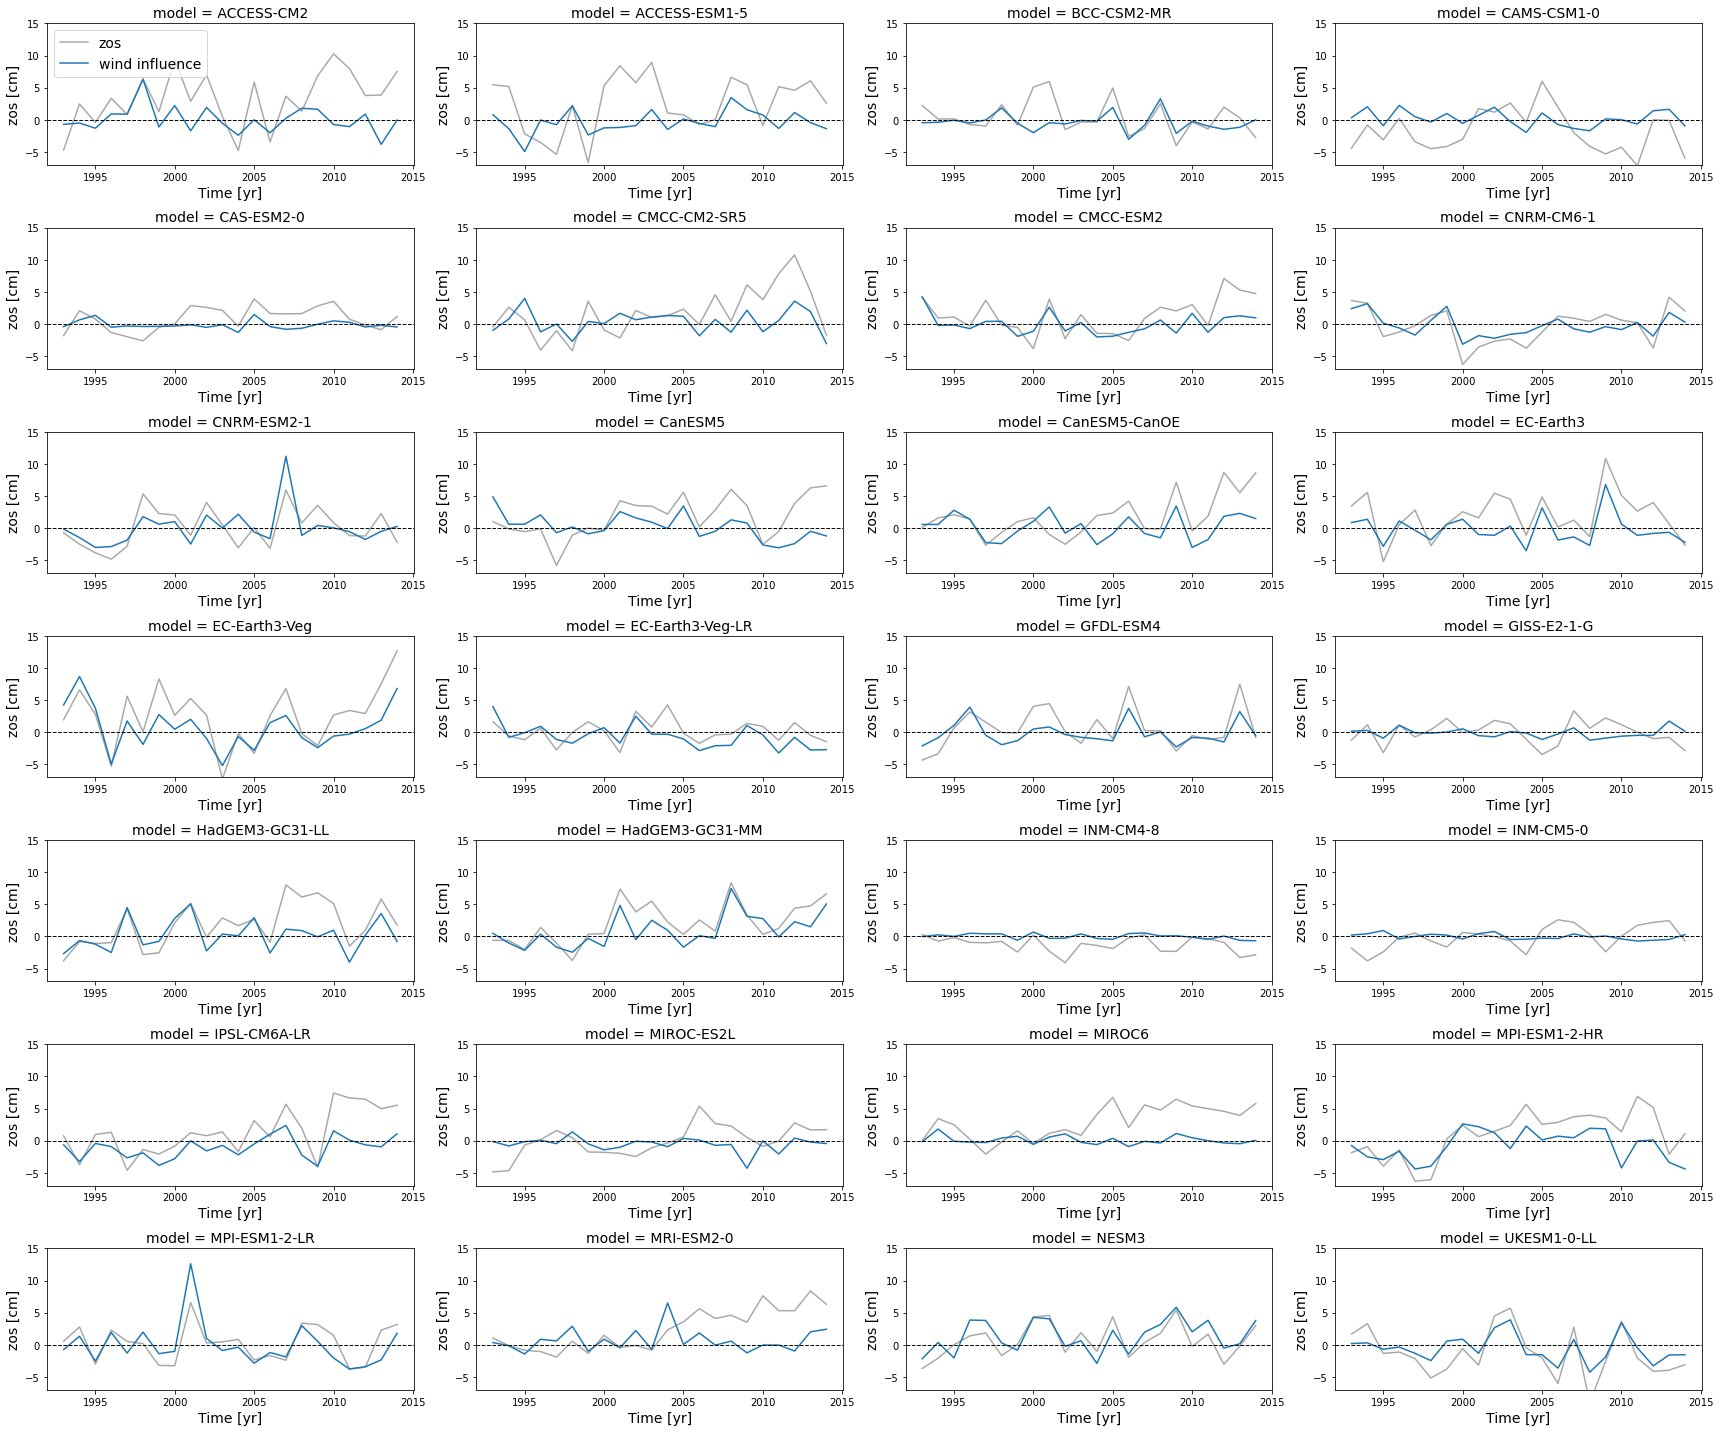

In [166]:
labels = ['wind_total']

figs.plot_zos_wind_effect_1993_2014(zos, timeseries, labels, model)

In [167]:
timeseries_1993 = timeseries.where(timeseries.time >=1993, drop = True)

In [168]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': timeseries_1993.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in timeseries_1993.model.values:
    df_trends['trend'][model] = linregress(timeseries_1993.time.values, timeseries_1993.wind_total.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(timeseries_1993.time.values, timeseries_1993.wind_total.sel(station = 'Average', model = model)).stderr*10

df_trends

trend        se
model                               
ACCESS-CM2       -0.625687   0.69853
ACCESS-ESM1-5     0.708253  0.587517
BCC-CSM2-MR      -0.258279  0.467598
CAMS-CSM1-0      -0.451777  0.411821
CAS-ESM2-0       -0.140443  0.222466
CMCC-CM2-SR5      0.054361  0.622675
CMCC-ESM2        -0.177765  0.540412
CNRM-CM6-1       -0.517181  0.564117
CNRM-ESM2-1       0.828688  0.978649
CanESM5          -1.640643  0.555967
CanESM5-CanOE     0.050227  0.680001
EC-Earth3        -0.222681  0.776899
EC-Earth3-Veg    -0.656854  1.155738
EC-Earth3-Veg-LR -1.500301  0.511398
GFDL-ESM4          0.00537  0.606535
GISS-E2-1-G      -0.080961  0.248592
HadGEM3-GC31-LL   0.390479  0.830741
HadGEM3-GC31-MM   2.158506   0.74535
INM-CM4-8        -0.260221  0.130825
INM-CM5-0        -0.328893  0.138552
IPSL-CM6A-LR      1.019344  0.543306
MIROC-ES2L       -0.361355  0.365268
MIROC6           -0.216634  0.220759
MPI-ESM1-2-HR      0.29831  0.811896
MPI-ESM1-2-LR    -1.071052  1.146576
MRI-ESM2-0        0.256226  0.613245
NESM3              1.02153  0.824227
UKESM1-0-LL       -0.70033  0.710192

In [169]:
df_trends[:14]

trend        se
model                               
ACCESS-CM2       -0.625687   0.69853
ACCESS-ESM1-5     0.708253  0.587517
BCC-CSM2-MR      -0.258279  0.467598
CAMS-CSM1-0      -0.451777  0.411821
CAS-ESM2-0       -0.140443  0.222466
CMCC-CM2-SR5      0.054361  0.622675
CMCC-ESM2        -0.177765  0.540412
CNRM-CM6-1       -0.517181  0.564117
CNRM-ESM2-1       0.828688  0.978649
CanESM5          -1.640643  0.555967
CanESM5-CanOE     0.050227  0.680001
EC-Earth3        -0.222681  0.776899
EC-Earth3-Veg    -0.656854  1.155738
EC-Earth3-Veg-LR -1.500301  0.511398

In [170]:
df_trends[14:]

trend        se
model                              
GFDL-ESM4         0.00537  0.606535
GISS-E2-1-G     -0.080961  0.248592
HadGEM3-GC31-LL  0.390479  0.830741
HadGEM3-GC31-MM  2.158506   0.74535
INM-CM4-8       -0.260221  0.130825
INM-CM5-0       -0.328893  0.138552
IPSL-CM6A-LR     1.019344  0.543306
MIROC-ES2L      -0.361355  0.365268
MIROC6          -0.216634  0.220759
MPI-ESM1-2-HR     0.29831  0.811896
MPI-ESM1-2-LR   -1.071052  1.146576
MRI-ESM2-0       0.256226  0.613245
NESM3             1.02153  0.824227
UKESM1-0-LL      -0.70033  0.710192

In [171]:
df_trends.to_csv('/Users/iriskeizer/Documents/Wind effect/Sybren/wind_influence_trends_1993_2014.csv')

In [172]:
zos_1993 = zos.where(zos.time >=1993, drop = True)

In [173]:
zos_wh_wind_1993 = zos_1993 - timeseries_1993.wind_total

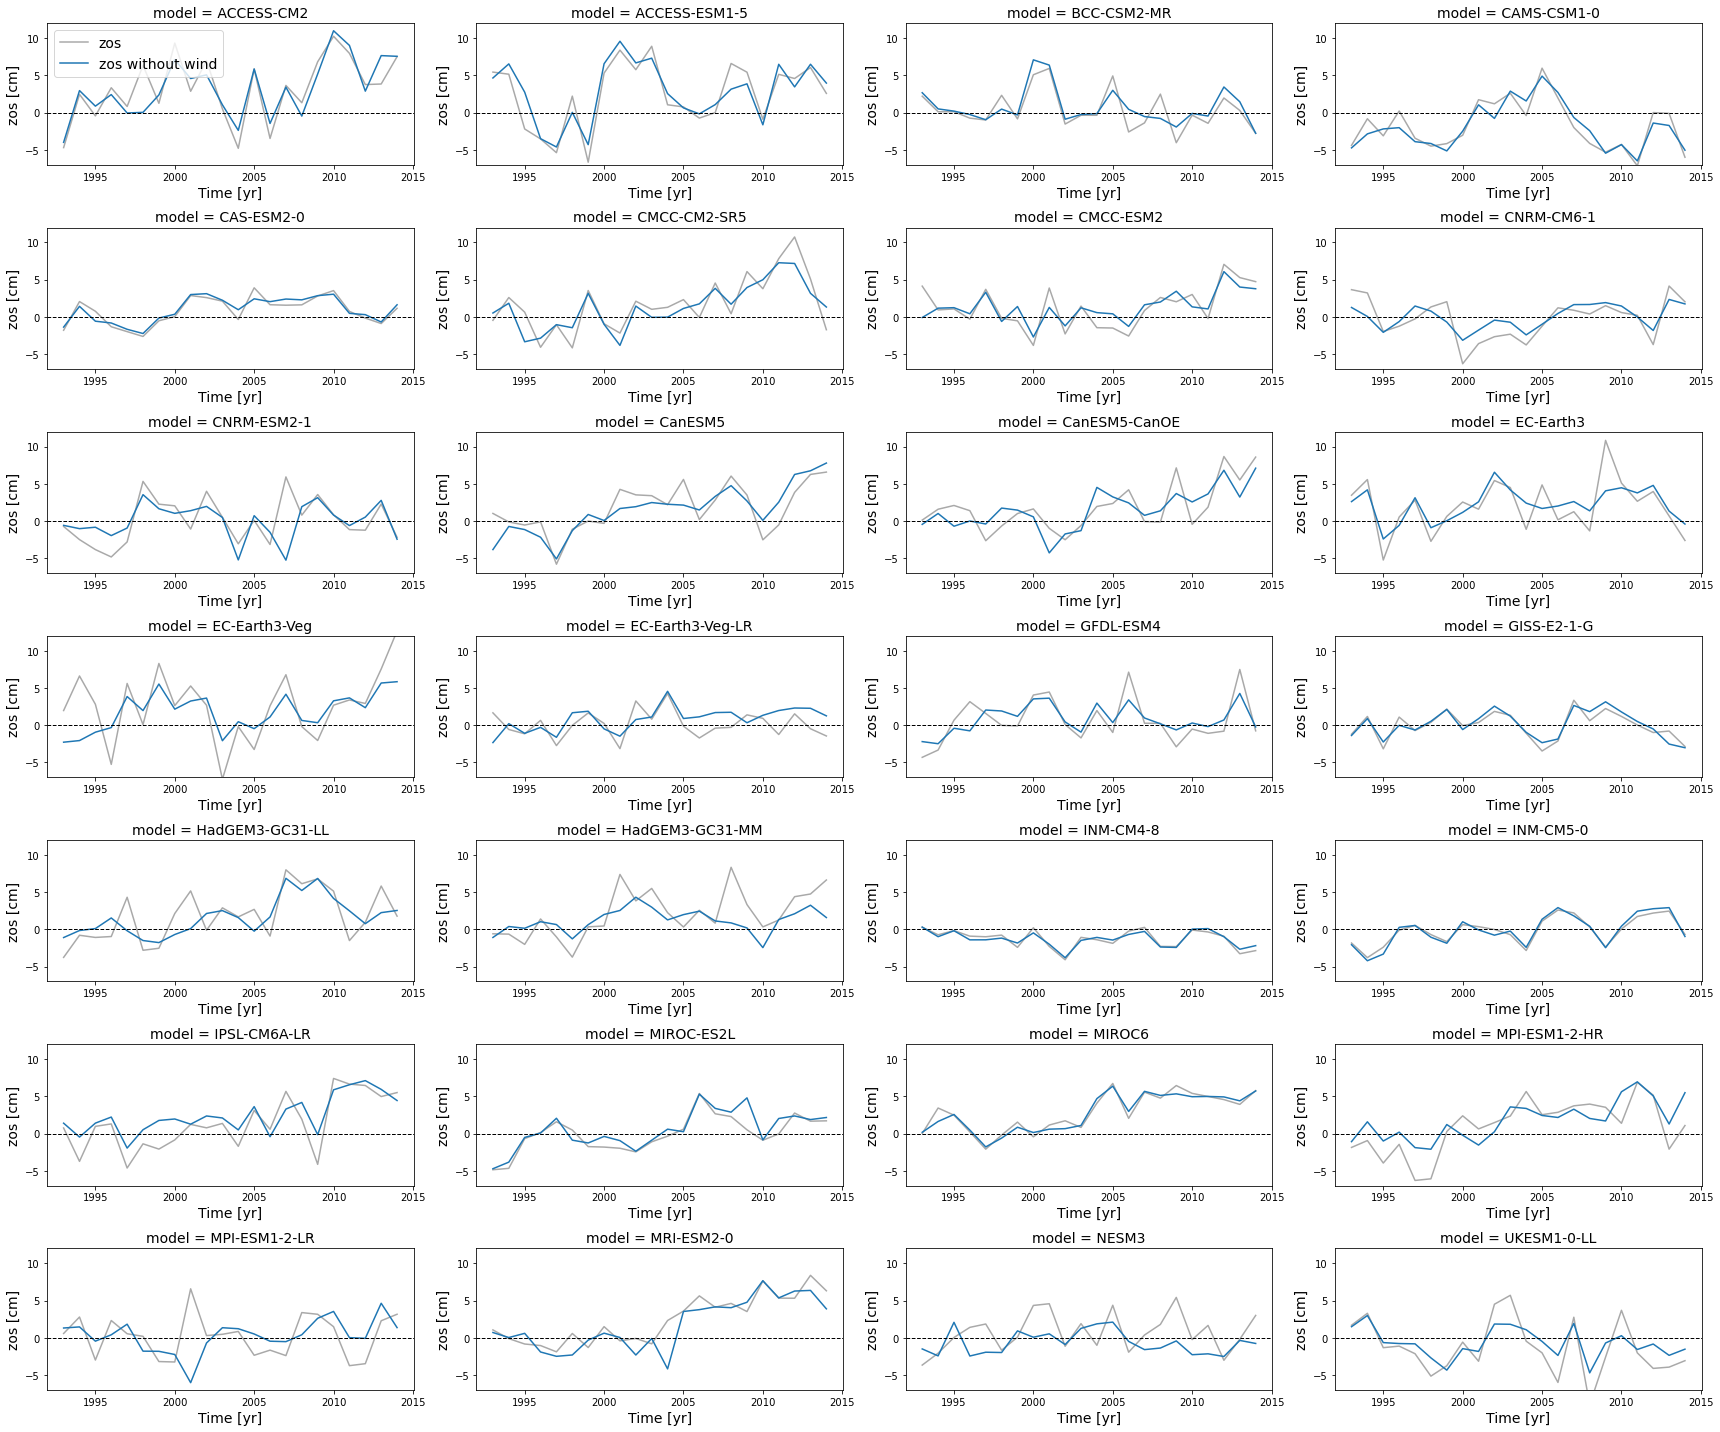

In [174]:
figs.plot_zos_without_wind_effect_1993_2014(zos, zos_wh_wind_1993)

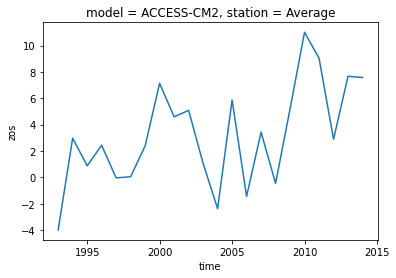

In [175]:
zos_wh_wind_1993.sel(station = 'Average', model = 'ACCESS-CM2').zos.plot()

In [176]:
linregress(zos_wh_wind_1993.time.values, zos_wh_wind_1993.zos.sel(station = 'Average', model = 'ACCESS-CM2'))

LinregressResult(slope=0.3293035456612262, intercept=-656.5336376879625, rvalue=0.5512152763292514, pvalue=0.00783789237292277, stderr=0.11145902332372722, intercept_stderr=223.30927282340807)

In [177]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': zos_wh_wind_1993.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in zos_wh_wind_1993.model.values:
    df_trends['trend'][model] = linregress(zos_wh_wind_1993.time.values, zos_wh_wind_1993.zos.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(zos_wh_wind_1993.time.values, zos_wh_wind_1993.zos.sel(station = 'Average', model = model)).stderr*10

df_trends

trend        se
model                               
ACCESS-CM2        3.293035   1.11459
ACCESS-ESM1-5     1.042029  1.350854
BCC-CSM2-MR      -0.762182  0.820529
CAMS-CSM1-0       0.017733  1.043819
CAS-ESM2-0        1.146007  0.518967
CMCC-CM2-SR5      3.155727  0.768577
CMCC-ESM2         1.545137  0.587868
CNRM-CM6-1        0.803061  0.519537
CNRM-ESM2-1       0.164207   0.80671
CanESM5           4.241888  0.575711
CanESM5-CanOE      2.81186  0.688523
EC-Earth3         0.820046  0.724796
EC-Earth3-Veg     2.019553  0.752305
EC-Earth3-Veg-LR  1.474225  0.431011
GFDL-ESM4         0.689807  0.626866
GISS-E2-1-G       -0.06894  0.634593
HadGEM3-GC31-LL   2.324086  0.666404
HadGEM3-GC31-MM   0.625972  0.517721
INM-CM4-8        -0.337931  0.345837
INM-CM5-0         1.826635  0.576859
IPSL-CM6A-LR      2.638422  0.605798
MIROC-ES2L        2.600785   0.65428
MIROC6            3.050076  0.525583
MPI-ESM1-2-HR     3.009636  0.579755
MPI-ESM1-2-LR     1.109345  0.713526
MRI-ESM2-0        3.947281   0.75471
NESM3            -0.190772  0.530126
UKESM1-0-LL      -0.757479  0.670276

In [178]:
df_trends.to_csv('/Users/iriskeizer/Documents/Wind effect/Sybren/zos_without_wind_trends_1993_2014.csv')

In [179]:
df_trends[:14]

trend        se
model                               
ACCESS-CM2        3.293035   1.11459
ACCESS-ESM1-5     1.042029  1.350854
BCC-CSM2-MR      -0.762182  0.820529
CAMS-CSM1-0       0.017733  1.043819
CAS-ESM2-0        1.146007  0.518967
CMCC-CM2-SR5      3.155727  0.768577
CMCC-ESM2         1.545137  0.587868
CNRM-CM6-1        0.803061  0.519537
CNRM-ESM2-1       0.164207   0.80671
CanESM5           4.241888  0.575711
CanESM5-CanOE      2.81186  0.688523
EC-Earth3         0.820046  0.724796
EC-Earth3-Veg     2.019553  0.752305
EC-Earth3-Veg-LR  1.474225  0.431011

In [180]:
df_trends[14:]

trend        se
model                              
GFDL-ESM4        0.689807  0.626866
GISS-E2-1-G      -0.06894  0.634593
HadGEM3-GC31-LL  2.324086  0.666404
HadGEM3-GC31-MM  0.625972  0.517721
INM-CM4-8       -0.337931  0.345837
INM-CM5-0        1.826635  0.576859
IPSL-CM6A-LR     2.638422  0.605798
MIROC-ES2L       2.600785   0.65428
MIROC6           3.050076  0.525583
MPI-ESM1-2-HR    3.009636  0.579755
MPI-ESM1-2-LR    1.109345  0.713526
MRI-ESM2-0       3.947281   0.75471
NESM3           -0.190772  0.530126
UKESM1-0-LL     -0.757479  0.670276